In [10]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA


In [11]:
imaging_data = pd.read_csv("toy_data_imaging.csv")
imaging_minimal = imaging_data.iloc[:,2:]
y = imaging_data.iloc[:,1]
print(imaging_data)


     participant_id  diagnosis      roi0      roi1      roi2      roi3  \
0          subject0       -1.0  1.103735  0.976105  1.070358  0.854421   
1          subject1       -1.0  0.978550  1.108902  0.893551  0.886115   
2          subject2       -1.0  0.911954  1.068084  1.189716  1.000129   
3          subject3       -1.0  0.988353  0.779630  1.085935  0.775582   
4          subject4       -1.0  0.962572  0.869503  1.029938  1.103088   
...             ...        ...       ...       ...       ...       ...   
1795    subject1795        1.0  0.995731  0.902431  1.062839  0.888057   
1796    subject1796        1.0  1.110225  1.005496  0.918571  1.050134   
1797    subject1797        1.0  0.980747  1.100119  1.013491  0.867414   
1798    subject1798        1.0  0.913652  0.943914  0.826538  1.054494   
1799    subject1799        1.0  0.991884  1.077665  1.048818  0.872075   

          roi4      roi5      roi6      roi7  ...    roi135    roi136  \
0     1.051961  1.025241  1.214902  1.

[0.09564559 0.06882265]
[[ 0.60566514 -0.07269844]
 [ 0.53009271  0.11053479]
 [ 0.55115973  0.17241882]
 ...
 [-0.16343098 -0.02571906]
 [-0.92047948 -0.13546029]
 [-0.48383664 -0.151661  ]]


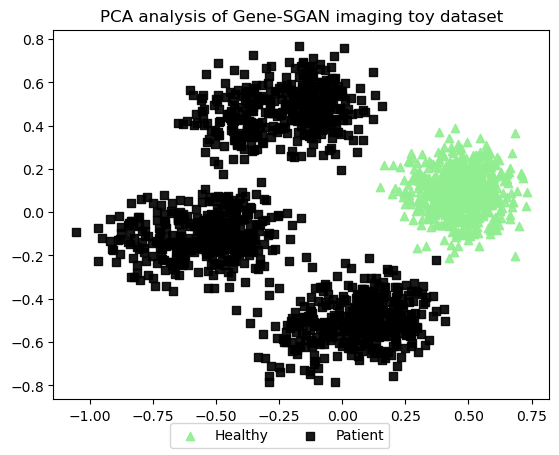

In [12]:
fig, ax = plt.subplots()
# PCA
pca = PCA(n_components=2,random_state=42)

pca_result = pca.fit_transform(imaging_minimal)
print(pca.explained_variance_ratio_)
print(pca_result)


for l, c, m in zip([-1,1], ["lightgreen", "black"], ('^', 's')):
    ax.scatter(pca_result[y == l, 0],
                pca_result[y == l, 1],
                color=c,
                label='cluster %s' % l,
                alpha=0.9,
                marker=m
                )

plt.title("PCA analysis of Gene-SGAN imaging toy dataset")
labels = ["Healthy","Patient"]
fig.legend(labels, loc='lower center',ncol=len(labels))

In [13]:
# filtering out patient only data 

patient_data = imaging_data.loc[imaging_data["diagnosis"] == 1,:]
patient_minimal = patient_data.iloc[:,2:]
print(patient_minimal)
ground_truth = pd.read_csv("toy_data_ground_truth.csv")
y = ground_truth.iloc[:,1]
print(y)

          roi0      roi1      roi2      roi3      roi4      roi5      roi6  \
600   1.064109  0.953707  1.034319  1.020244  0.702135  0.882553  1.133318   
601   1.045436  0.933038  1.056347  1.024579  0.777969  0.857977  0.901510   
602   1.046640  1.077168  1.047961  0.865588  0.913810  0.771641  0.719595   
603   0.746936  1.070795  1.024257  1.166989  0.873117  1.026943  1.014518   
604   1.104929  1.004432  1.097849  1.077099  0.859668  0.695727  1.112147   
...        ...       ...       ...       ...       ...       ...       ...   
1795  0.995731  0.902431  1.062839  0.888057  0.966019  0.984647  1.043323   
1796  1.110225  1.005496  0.918571  1.050134  0.715727  0.779421  1.090959   
1797  0.980747  1.100119  1.013491  0.867414  0.786782  0.945555  1.045850   
1798  0.913652  0.943914  0.826538  1.054494  0.868547  0.766069  0.856117   
1799  0.991884  1.077665  1.048818  0.872075  0.860728  0.877536  1.010036   

          roi7      roi8      roi9  ...    roi135    roi136    

(1800, 2)
0.11053479038046099
0       1
1       1
2       1
3       1
4       1
       ..
1195    3
1196    3
1197    3
1198    3
1199    3
Name: cluster_label, Length: 1200, dtype: int64


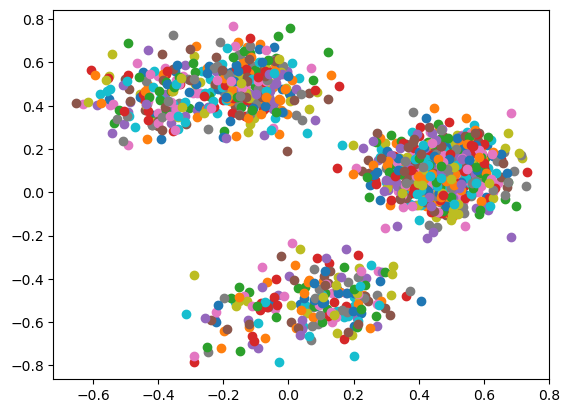

In [14]:
print(np.shape(pca_result))
print(pca_result[1,1])
print(y)
for i in range(1200):
    plt.scatter(pca_result[i,0],pca_result[i,1])

[0.10312374 0.06725271]
[[-0.45934299  0.09533456]
 [-0.37639986  0.27919481]
 [-0.46595251 -0.53384496]
 ...
 [ 0.00751909  0.23714815]
 [-0.15508066 -0.54221539]
 [ 0.02296227  0.17101935]]


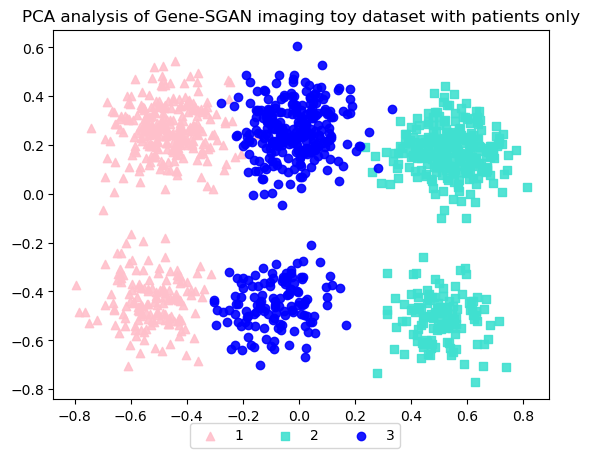

In [15]:
fig, ax = plt.subplots()
# PCA
pca = PCA(n_components=2,random_state=42)

pca_result = pca.fit_transform(patient_minimal)
print(pca.explained_variance_ratio_)
print(pca_result)


for l, c, m in zip([1,2,3], ["pink", "turquoise", "blue"], ('^', 's', "o")):
    ax.scatter(pca_result[y == l, 0],
                pca_result[y == l, 1],
                color=c,
                label='cluster %s' % l,
                alpha=0.9,
                marker=m
                )

plt.title("PCA analysis of Gene-SGAN imaging toy dataset with patients only")
labels = [1,2,3]
fig.legend(labels, loc='lower center',ncol=len(labels))

In [16]:
# PCA
pca = PCA(n_components=2,random_state=42)

pca_result = pca.fit_transform(patient_minimal)
print(pca.explained_variance_ratio_)
print(pca_result)


[0.10312374 0.06725271]
[[-0.45934299  0.09533456]
 [-0.37639986  0.27919481]
 [-0.46595251 -0.53384496]
 ...
 [ 0.00751909  0.23714815]
 [-0.15508066 -0.54221539]
 [ 0.02296227  0.17101935]]


In [17]:
print(len(pca_result))

1200


In [18]:
from sklearn.cluster import KMeans


In [19]:
kmeans = KMeans(n_clusters=3, random_state=0, n_init="auto").fit(pca_result)
y = kmeans.labels_
print((y[100:150]))

[1 1 2 1 1 2 2 1 2 2 1 1 1 2 2 2 2 1 1 2 1 1 1 1 1 2 2 1 2 1 2 2 1 1 2 1 2
 1 1 1 1 1 2 1 1 1 1 1 1 1]


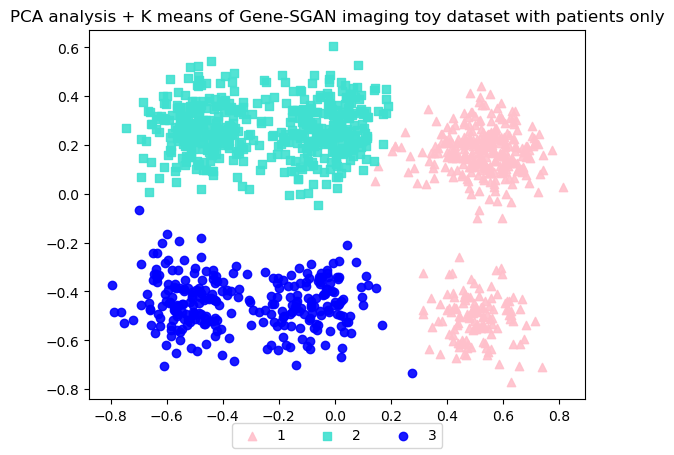

In [20]:
fig, ax = plt.subplots()

for l, c, m in zip([0,1,2], ["pink", "turquoise", "blue"], ('^', 's', "o")):
    ax.scatter(pca_result[y == l, 0],
                pca_result[y == l, 1],
                color=c,
                label='cluster %s' % l,
                alpha=0.9,
                marker=m
                )

plt.title("PCA analysis + K means of Gene-SGAN imaging toy dataset with patients only")
labels = [1,2,3]
fig.legend(labels, loc='lower center',ncol=len(labels))